In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from playsound import playsound

In [2]:
df=pd.read_csv('EURUSD.csv',low_memory=False)

In [3]:
df.dropna(inplace=True)

In [4]:
df.reset_index(drop=True,inplace=True)

In [6]:
df1=df[list(map(str,list(range(0,11*4))))].T

In [7]:
df1=((2*df1-df1.max()-df1.min())/(2*(df1.max()-df1.min()))).T

In [8]:
df.Action.value_counts()

-1    52926
 1    23466
 0    23113
Name: Action, dtype: int64

In [9]:
df2=df.Action[df.Action==1]

In [10]:
df3=df.Action[df.Action==0]

In [10]:
df4=df.Action[df.Action==0].sample(n=random.randint(7000,7200))

In [13]:
df5=df.Action[df.Action==1].sample(n=random.randint(3400,3600))

In [14]:
df6=df.Action[df.Action==3].sample(n=random.randint(3400,3600))

In [15]:
df7=df.Action[df.Action==4].sample(n=random.randint(3400,3600))

In [16]:
df8=df.Action[df.Action==6].sample(n=random.randint(3400,3600))

In [11]:
df2=pd.concat([df2,df3],axis=0,ignore_index=False)

In [12]:
df2.sort_index(inplace=True)

In [13]:
len(list(df2.index))

46579

In [14]:
df2.value_counts()

1    23466
0    23113
Name: Action, dtype: int64

In [15]:
df1=df1.iloc[list(df2.index),:]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(df1,df2,test_size=0.2)

In [17]:
Y_test.value_counts()

0    4676
1    4640
Name: Action, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)

In [19]:
model.fit(X_train,Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [23]:
model.score(X_test,Y_test)

0.5391004206665948

Text(69.0, 0.5, 'Truth')

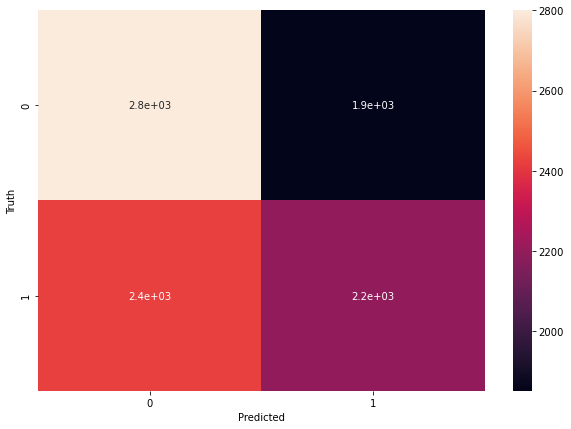

In [24]:
Y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Action==>
##  0 ==> No Action
##  1 ==> Up
##  2 ==> Up&DownExit
##  3 ==> DownExit
##  4 ==> Down
##  5 ==> Down&UpExit
##  6 ==> UpExit